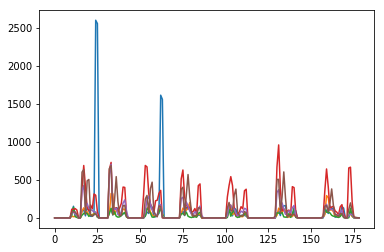

In [1]:
# --------------------------------------------------
#
# per-dimension energy bins
#
# --------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# config  params
FILE = 'data/pills-s0.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5

# derived values
inc = int(window_overlap * window_len)
x = np.load(FILE)[:4500]
W = [(s, s + window_len) for s in range(0, x.shape[0]-inc, inc)]

# energy windows
results = []
for (start, stop) in W:
    window = signal.get_window('boxcar', window_len)
    _, energy = signal.welch(x[start:stop], fs, window=window, axis=0)
    results.append(np.mean(energy, axis=0))

# plot results
plt.plot(results)
plt.show()

(4500,) (4500, 3)
[44950 44960 44970 44980 44990]
179 [43750.0, 44000.0, 44250.0, 44500.0, 44750.0]


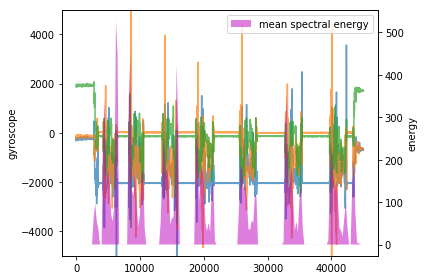

In [2]:
# --------------------------------------------------
#
# energy overlayed with the signals
#
# --------------------------------------------------

# %matplotlib tk
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# config  params
FILE = 'data/pills-s0.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5

# derived values
inc = int(window_overlap * window_len)
x = np.load(FILE)[:4500]
W = [(s, s + window_len, (s + s + window_len)/2 * 10) for s in range(0, x.shape[0]-inc, inc)]
t = np.arange(4500) * 10

# energy windows
results = []
rt = []
for (start, stop, _t) in W:
    window = signal.get_window('boxcar', window_len)
    _, energy = signal.welch(x[start:stop], fs, window=window, axis=0)
    results.append(np.mean(energy))
    rt.append(_t)

print(t.shape, x[:,:-3].shape)
print(t[-5:])
print(len(rt), rt[-5:])

# plot results
fig, ax1 = plt.subplots()
ax1.plot(t, x[:,:-3], alpha=.7)
ax1.set_ylabel('gyroscope')
ax1.set_ylim(-5000, 5000)
ax2 = ax1.twinx()
ax2.fill(rt, results, 'm', alpha=.5)
ax2.set_ylabel('energy')
ax2.legend(['mean spectral energy'])
fig.tight_layout()
plt.show()

segmentations 90 90
(90, 6) (26, 6)


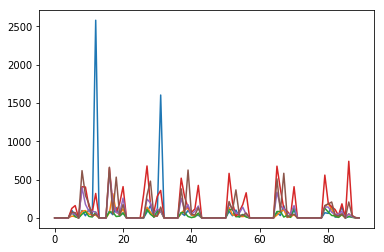

In [15]:
# --------------------------------------------------
#
# energy bins using np.array_split() instead
#
# --------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# config  params
FILE = 'data/pills-s0.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5

# derived values
inc = int(window_overlap * window_len)
x = np.load(FILE)
segs = int(len(x) / window_len)
W = np.array_split(x,segs)
print('segmentations', segs, len(W))


results = []
for w in W:
    window = signal.get_window('boxcar', len(w))
    _, energy = signal.welch(w, fs, window=window, axis=0)
    results.append(np.mean(energy, axis=0))
R = np.array(results)
print(R.shape, energy.shape)
# plot results
plt.plot(results)
plt.show()

segmentations 90 90 4506
(4506, 6) (90, 6) (90,)


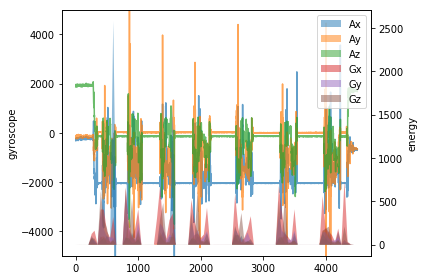

In [34]:
# --------------------------------------------------
#
# energy bins using np.array_split() instead
#
# --------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# config  params
FILE = 'data/pills-s0.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5
labels = ['Ax','Ay','Az', 'Gx','Gy','Gz']

# derived values
inc = int(window_overlap * window_len)
x = np.load(FILE)
segs = int(len(x) / window_len)
W = np.array_split(x,segs)
t = np.arange(len(x))
print('segmentations', segs, len(W), len(t))


results, rt = [], []
for i,w in enumerate(W):
    window = signal.get_window('boxcar', len(w))
    _, energy = signal.welch(w, fs, window=window, axis=0)
    results.append(np.mean(energy, axis=0))
    rt.append(len(w) * i)
R = np.array(results)
print(x.shape, R.shape, np.array(rt).shape)

# plot data
fig, ax1 = plt.subplots()
ax1.plot(t, x[:,:-3], alpha=.7)
ax1.set_ylabel('gyroscope')
ax1.set_ylim(-5000, 5000)
# overlay spectral energy
ax2 = ax1.twinx()
for j in range(R.shape[-1]):
    ax2.fill(rt, R[:,j],label=labels[j], alpha=.5)
ax2.set_ylabel('energy')
ax2.legend()
fig.tight_layout()
plt.show()

(179, 6) (26, 6)


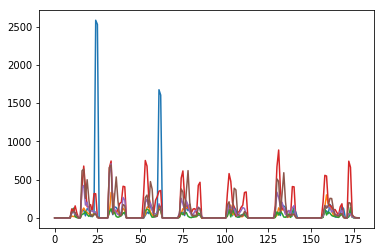

In [16]:
# --------------------------------------------------
#
# np.array_split() with 50% overlap
#
# --------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# config  params
FILE = 'data/pills-s0.npy'
fs = 10e3  # used to scale down spectral energy result
window_len = 50
window_overlap = .5


# derived values
inc = int(window_overlap * window_len)
x = np.load(FILE)

def interweave(a,b):
    return np.ravel(np.column_stack((a,b)))

def windows(x, window_len=50):
    # get indices array
    I = np.arange(len(x))
    # divide into possibly uneven window lengths
    segs = int(len(x) / window_len)
    splits = np.array_split(x, segs)
    true_window_lengths = np.array([len(s) for s in splits])
    # get overlap 50% window indices
    incs = (true_window_lengths * 0.5).astype(int)
    i_splits = np.array_split(I, segs)
    i_mins = np.array([s[0] for s in i_splits])
    i_maxs = np.array([s[-1] for s in i_splits])
    i_mids = i_mins + incs
    # get windows into original array
    mids = np.array_split(x, i_mids)
    maxs = np.array_split(x, i_maxs)
    staggered = interweave(mids, maxs)
    return staggered[1:-2]

W = windows(x)
    


results = []
for w in W:
    window = signal.get_window('boxcar', len(w))
    _, energy = signal.welch(w, fs, window=window, axis=0)
    results.append(np.mean(energy, axis=0))
R = np.array(results)
print(R.shape, energy.shape)
# plot results
plt.plot(results)
plt.show()